# Tarea 1 - Fernando Urzúa Videla

# Parte Teórica
¿Qué es un paradigma de programación? Es un enfoque para escribir código. Un paradigma tiene principios y estructura específica para organizar el código de cierta forma. Por ejemplo la programación orientada objetos.

¿En qué se basa la programación orientada a objetos? Se basa en organizar el código en objetos, que son instancias de clases. Los objetos permiten modelar los datos como conceptos de la vida real. Este paradigma de programación permite organizar el código y reutilizarlo.

¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación big O? La recursividad ocurre cuando una función se llama sí misma repetidas veces hasta que se cumpla una condición, en cambio la iteración usa bucles for y while hasta cumplir una condición. La notación Big O permite determinar el orden del tiempo que toma el código ya sea iterativo o recursivo.

Explicar diferencia de rendimiento de O(1) y O(n).
O(1) significa que el código toma un tiempo de ejecución de orden 1, es decir, constante, sin importar el el tamaño de la entrada.
Por otro lado, O(n) significa que el código toma un tiempo de ejecución de orden n, con n el tamaño de la entrad. Lo que quiere decir que el tiempo es proporcional al tamaño de la entrada de forma lineal o al menos afín.

¿Cómo se calcula el orden en un programa que funciona por etapas?
Se calcula la complejidad temporal de cada etapa y se utiliza la más grande como el orden del programa. Esto debido a que para n muy grande, la complejidad temporal mayor superará por mucho a la menor haciendola despreciable.

¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?
Viendo cómo el número de operaciones que tiene que determinar el algoritmo cambia según la entrada que recibe. Por ejemplo:


In [ ]:
def suma(n):
    if n == 0:
        print(n)
        return 0
    else:
        print(n)
        return n + suma(n-1)


Al ejecutar el código anterios se observa que la función realiza n llamadas recursivas, por lo tanto tiene complejidad n.

# Parte de programación

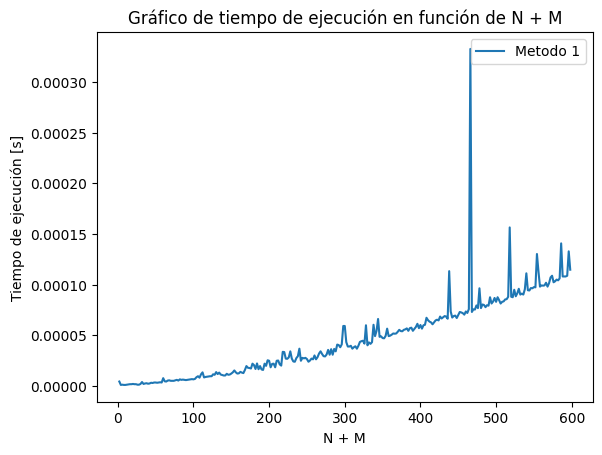

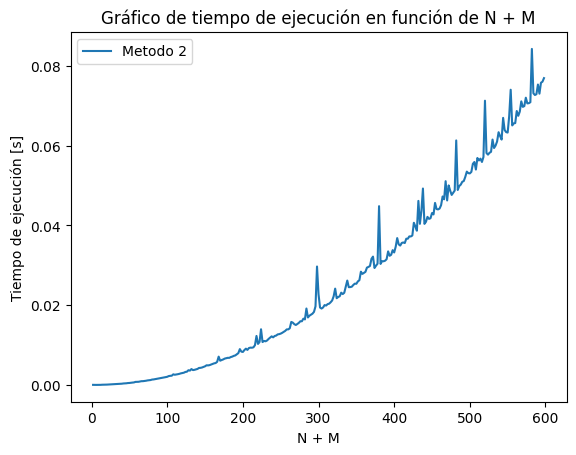

In [2]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
# Definiendo el decorador:
def Decorador(funcion):
    def FuncionDecorada(self,metodo):
        inicio = time.time()
        resultado = funcion(self,metodo)
        fin = time.time()
        return resultado, fin - inicio
    return FuncionDecorada

class CaminosPCB:
    def __init__ (self, n, m):
        self.n = n
        self.m = m
    # FORMA 1: El problema se puede ver como una combinatoria de 2 opciones: moverse M-1 veces a la derecha y N-1 veces hacia abajo, coon un total de N + M - 2
    # movimientos.
    def ContarCaminos1(self):
        return math.comb( self.n + self.m-2,self.n-1)

    # FORMA 2: Se puede emular la grilla usando una matriz de NxM donde cada posición indique las formas en que se puede llegar hasta ahí solo moviendose hacia la
    # derecha y hacia abajo.
    def ContarCaminos2(self):
        # Primero creando la matriz:
        matriz = np.zeros((self.n,self.m))
        # Para llegar a cualquier elemento de la primera fila solo se puede hacer de una forma que es moviendose a la derecha, luego la primera fila de la matriz
        # está llena de 1.
        # Asimismo, para llegar a cualquier elemento de la primera columna solo se puede hacer bajando y, por lo tanto, la primera columna está llena de 1.
        for i in range(self.m):
            matriz[0][i] = 1
        for i in range(self.n):
            matriz[i][0] = 1
        # Para el resto de los puntos se tendrá que serán la suma de las formas de llegar hasta el punto de arriba más la forma de llegar al punto de la izquierda
        for i in range(1,self.n):
            for j in range(1,self.m):
                matriz[i][j] = matriz[i-1][j] + matriz[i][j-1]
        # Luego las formas de llegar a la esquina inferior derecha de la grilla será igual al valor de la matriz en esa esquina:
        return matriz[self.n - 1][self.m - 1]

    # Método para alternar caminos
    @Decorador
    def ContarCaminos(self, metodo):
        if metodo == "metodo1":
            return self.ContarCaminos1()
        elif metodo == "metodo2":
            return self.ContarCaminos2()


# Graficando:
mn = [] # Eje x consistente en N+M
tiempo1 = []
tiempo2 = []
for n in range(1,300):
    mn.append(n + n)
    caminos = CaminosPCB(n, n)

    # Tiempo para metodo1
    tiempo1.append(caminos.ContarCaminos("metodo1")[1])

    # Tiempo para metodo2
    tiempo2.append(caminos.ContarCaminos("metodo2")[1])
plt.figure()
plt.title("Gráfico de tiempo de ejecución en función de N + M")
plt.plot(mn, tiempo1, label = "Metodo 1")
plt.xlabel("N + M")
plt.ylabel("Tiempo de ejecución [s]")
plt.legend()
plt.figure()
plt.title("Gráfico de tiempo de ejecución en función de N + M")
plt.plot(mn, tiempo2, label = "Metodo 2")
plt.xlabel("N + M")
plt.ylabel("Tiempo de ejecución [s]")
plt.legend()
plt.show()





